# 6. Asign taxonomy to nanopore reads

In [1]:
library(tidyverse) 
library(dplyr)
library(ggplot2)
library(ggpubr)
library(forcats)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
print("Working directory before:")
getwd()

setwd("/home/strawberry/Documents/Collaborations/sinusite_edwin/data") # changing work directory to data 
print("Working directory after:")
getwd()

[1] "Working directory before:"


[1] "/home/strawberry/Documents/Collaborations/sinusite_edwin/scripts"

[1] "Working directory after:"


[1] "/home/strawberry/Documents/Collaborations/sinusite_edwin/data"

In [3]:
# Loading reference file (linking refseq accession number and taxID) - this file was obtained parsing gff3 file provided by NCBI 
# RefseqTaxID <- read.delim("./RefseqTaxID.txt", h=T)
# head(RefseqTaxID)
SILVATaxID <- read.csv("./silva_taxonomy.csv", h=T)
SILVATaxID$id <- gsub("\\..*", "", SILVATaxID$id) # Clean the 'id' column (remove everything after the first dot)
print(head(SILVATaxID))

# Loading TaxID full lineage file - no need for SILVA db, already contains id linked to full taxonomy in the above df 
# TaxID_FullLineage <- read.delim("./referencetable_taxonomy_RefseqNCBI_16S.txt", quote = "")
# head(TaxID_FullLineage)

# Loading metadata file (read counts before quality check, should be replaced)
metadata_full_clean <- read.delim("./metadata_full_clean.tsv", h=T) 
read_counts_chopper <- read.delim("./read_counts_chopper.tsv", h=T)
print(head(read_counts_chopper))

## Replace nreads value to represent only reads retained after filtering
metadata_full_clean$nreads <- read_counts_chopper$filt_reads[
  match(metadata_full_clean$ID_Sample, read_counts_chopper$ID_Sample)
]

print(head(metadata_full_clean))

        id  Kingdom         Phylum               Class            Order
1 AB000393 Bacteria Pseudomonadota Gammaproteobacteria Enterobacterales
2 AB000480 Bacteria Pseudomonadota Alphaproteobacteria Rhodospirillales
3 AB001783 Bacteria    Chlamydiota          Chlamydiia     Chlamydiales
4 FZ423313 Bacteria      Bacillota             Bacilli       Bacillales
5 HG529990 Bacteria   Bacteroidota         Bacteroidia     Cytophagales
6 AB001778 Bacteria    Chlamydiota          Chlamydiia     Chlamydiales
             Family             Genus                      Species
1      Vibrionaceae            Vibrio           Vibrio halioticoli
2 Rhodospirillaceae Insolitispirillum Insolitispirillum peregrinum
3     Chlamydiaceae         Chlamydia            Chlamydia abortus
4       Bacillaceae     Anoxybacillus                 unidentified
5 Cyclobacteriaceae      Algoriphagus        Algoriphagus sp. AK58
6     Chlamydiaceae         Chlamydia           Chlamydia psittaci
    ID_Sample raw_reads fil

In [4]:
# Make a repository with kma output
fragfiles <- list.files("./", pattern = ".frag$")
fragfiles

[1] "0001967K_T1_filtered_kma.frag"  "0001967K_T3_filtered_kma.frag" 
  [3] "0001967K_T6_filtered_kma.frag"  "0018303G_T0_filtered_kma.frag" 
  [5] "0088303G_T0_filtered_kma.frag"  "0088303G_T1_filtered_kma.frag" 
  [7] "0088303G_T3_filtered_kma.frag"  "0110059G_T0_filtered_kma.frag" 
  [9] "0110059G_T1_filtered_kma.frag"  "0110059G_T12_filtered_kma.frag"
 [11] "0110059G_T3_filtered_kma.frag"  "0110059G_T6_filtered_kma.frag" 
 [13] "0120695B_T0_filtered_kma.frag"  "0130765A_T0_filtered_kma.frag" 
 [15] "0130765A_T1_filtered_kma.frag"  "0130765A_T12_filtered_kma.frag"
 [17] "0130765A_T3_filtered_kma.frag"  "0130765A_T6_filtered_kma.frag" 
 [19] "0207720E_T0_filtered_kma.frag"  "0207720E_T1_filtered_kma.frag" 
 [21] "0207720E_T12_filtered_kma.frag" "0207720E_T3_filtered_kma.frag" 
 [23] "0236549G_T0_filtered_kma.frag"  "0236549G_T12_filtered_kma.frag"
 [25] "0236549G_T3_filtered_kma.frag"  "0236549G_T6_filtered_kma.frag" 
 [27] "0313863D_T0_filtered_kma.frag"  "0313863D_T1_filtered_kma.frag" 
 [29] "0313863D_T12_filtered_kma.frag" "0313863D_T3_filtered_kma.frag" 
 [31] "0332596H_T0_filtered_kma.frag"  "0332596H_T1_filtered_kma.frag" 
 [33] "0332596H_T6_filtered_kma.frag"  "0358613K_T0_filtered_kma.frag" 
 [35] "0358613K_T1_filtered_kma.frag"  "0358613K_T3_filtered_kma.frag" 
 [37] "0358613K_T6_filtered_kma.frag"  "0492882D_T0_filtered_kma.frag" 
 [39] "0492882D_T1_filtered_kma.frag"  "0492882D_T12_filtered_kma.frag"
 [41] "0492882D_T3_filtered_kma.frag"  "0492882D_T6_filtered_kma.frag" 
 [43] "0514164A_T0_filtered_kma.frag"  "0514164A_T1_filtered_kma.frag" 
 [45] "0514164A_T3_filtered_kma.frag"  "0514164A_T6_filtered_kma.frag" 
 [47] "0518952I_T0_filtered_kma.frag"  "0561785J_T0_filtered_kma.frag" 
 [49] "0584352K_T0_filtered_kma.frag"  "0584352K_T1_filtered_kma.frag" 
 [51] "0584352K_T3_filtered_kma.frag"  "0584352K_T6_filtered_kma.frag" 
 [53] "0689227I_T0_filtered_kma.frag"  "0689227I_T1_filtered_kma.frag" 
 [55] "0689227I_T12_filtered_kma.frag" "0689227I_T3_filtered_kma.frag" 
 [57] "0689227I_T6_filtered_kma.frag"  "0732163H_T0_filtered_kma.frag" 
 [59] "0732163H_T3_filtered_kma.frag"  "0732163H_T6_filtered_kma.frag" 
 [61] "0780068I_T0_filtered_kma.frag"  "0780068I_T12_filtered_kma.frag"
 [63] "0780068I_T3_filtered_kma.frag"  "0780068I_T6_filtered_kma.frag" 
 [65] "0784533E_T0_filtered_kma.frag"  "0784533E_T1_filtered_kma.frag" 
 [67] "0784533E_T3_filtered_kma.frag"  "0784533E_T6_filtered_kma.frag" 
 [69] "0878122D_T0_filtered_kma.frag"  "0878122D_T3_filtered_kma.frag" 
 [71] "0878122D_T6_filtered_kma.frag"  "0928507A_T0_filtered_kma.frag" 
 [73] "0974256K_T0_filtered_kma.frag"  "0974256K_T1_filtered_kma.frag" 
 [75] "0980601G_T0_filtered_kma.frag"  "0980601G_T1_filtered_kma.frag" 
 [77] "0980601G_T12_filtered_kma.frag" "0980601G_T3_filtered_kma.frag" 
 [79] "0980601G_T6_filtered_kma.frag"  "0990961D_T0_filtered_kma.frag" 
 [81] "0990961D_T1_filtered_kma.frag"  "0990961D_T12_filtered_kma.frag"
 [83] "0990961D_T3_filtered_kma.frag"  "0990961D_T6_filtered_kma.frag" 
 [85] "1190552D_T0_filtered_kma.frag"  "1190552D_T12_filtered_kma.frag"
 [87] "1190552D_T3_filtered_kma.frag"  "1272679D_T0_filtered_kma.frag" 
 [89] "1272679D_T1_filtered_kma.frag"  "1272679D_T12_filtered_kma.frag"
 [91] "1272679D_T3_filtered_kma.frag"  "1272679D_T6_filtered_kma.frag" 
 [93] "1377897D_T0_filtered_kma.frag"  "1377897D_T1_filtered_kma.frag" 
 [95] "1377897D_T12_filtered_kma.frag" "1377897D_T3_filtered_kma.frag" 
 [97] "1427495A_T0_filtered_kma.frag"  "1427495A_T12_filtered_kma.frag"
 [99] "1427495A_T3_filtered_kma.frag"  "1427495A_T6_filtered_kma.frag" 
[101] "1512536E_T0_filtered_kma.frag"  "1512536E_T1_filtered_kma.frag" 
[103] "1512536E_T12_filtered_kma.frag" "1512536E_T3_filtered_kma.frag" 
[105] "1512536E_T6_filtered_kma.frag"  "1526680J_T1_filtered_kma.frag" 
[107] "1526680J_T12_filtered_kma.frag" "1526680J_T3_filtered_kma.frag" 
[109] "1526680J_T6_filtered_kma.frag"  "1532317F_T0_filtered_kma.frag" 
[111] "1532317F_T12_filtered_kma.frag" "15

In [6]:
# Start with an empty dataframe
dfall <- NULL  

for(i in 1:length(fragfiles)){
    
# Load the .frag file
tab <- read.delim(fragfiles[i], h = FALSE)
# print(head(tab))

# Extract per-read best hit info
readID <- sub(" .*", "", tab$V7) # extract read ID
template_id <- gsub("\\..*", "", gsub("'", "", tab$V6)) # extract template ID without version
# head(readID)
# head(template_id)

# Build per-read hit table
readhits <- data.frame(readID, template_id, stringsAsFactors = FALSE)
# print(head(readhits))
      
# Remove duplicated reads (keeping only first hit per read)
readhits_unique <- readhits[!duplicated(readhits$readID), ]
# print(head(readhits_unique))

# Count number of hits per template
template_counts <- as.data.frame(table(readhits_unique$template_id))
colnames(template_counts) <- c("id", "count")
# print(head(template_counts))

# Merge with SILVA taxonomy
template_tax <- merge(template_counts, SILVATaxID, by = "id")

# Add sample ID (from file name — adjust as needed)
ID_Sample <- gsub("_filtered_kma.frag$", "", basename(fragfiles[i]))
template_tax$ID_Sample <- ID_Sample

# Add total aligned reads and calculate relative abundance
template_tax$total_aligned <- nrow(readhits_unique)
template_tax$RelativeAbundance <- template_tax$count / template_tax$total_aligned * 100
# head(template_tax)

# Merge with metadata and calculate alignment efficiency
template_tax_merge <- merge(template_tax, metadata_full_clean, by = "ID_Sample")
template_tax_merge$AlignmentEfficiency <- template_tax_merge$total_aligned / template_tax_merge$nreads * 100
# head(template_tax_merge)

# Optional: store in cumulative df
dfall <- rbind(dfall, template_tax_merge)
}

In [7]:
print(head(dfall))

    ID_Sample           id count  Kingdom         Phylum          Class
1 0001967K_T1     AB646616     1 Bacteria      Bacillota        Bacilli
2 0001967K_T1     AF015929     4 Bacteria      Bacillota        Bacilli
3 0001967K_T1 AGEF01000005     1 Bacteria      Bacillota        Bacilli
4 0001967K_T1 AIYD01000002     2 Bacteria      Bacillota        Bacilli
5 0001967K_T1     AJ439343     1 Bacteria Actinomycetota Actinobacteria
6 0001967K_T1     AJ938182     1 Bacteria      Bacillota        Bacilli
             Order             Family           Genus
1 Staphylococcales  Staphylococcaceae  Staphylococcus
2 Staphylococcales  Staphylococcaceae  Staphylococcus
3  Lactobacillales  Carnobacteriaceae  Dolosigranulum
4 Staphylococcales  Staphylococcaceae  Staphylococcus
5  Mycobacteriales Corynebacteriaceae Corynebacterium
6 Staphylococcales  Staphylococcaceae  Staphylococcus
                               Species total_aligned RelativeAbundance SNOT22
1       Staphylococcus saccharolyticus  

In [96]:
write.table(dfall, "ReadCounts_TaxAnnotation_SILVA.tsv", quote = F, sep = "\t", row.names = F)

In [8]:
print("Relative Abundance:")
print(summary(dfall$RelativeAbundance))

print("Alignment Efficency:")
print(summary(dfall$AlignmentEfficiency))

[1] "Relative Abundance:"
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00261  0.03296  0.09213  0.34734  0.29240 68.93964 
[1] "Alignment Efficency:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  26.84   99.81   99.91   95.86   99.96  100.00 


In [14]:
# Group samples and calculate annotation efficiency
AlignmentEfficiency_patient <- dfall %>%
  group_by(Patient) %>%
  summarise(mean_AlignmentEfficiency = mean(AlignmentEfficiency, na.rm = TRUE),
            sd_AlignmentEfficiency = sd(AlignmentEfficiency, na.rm = TRUE))
print(AlignmentEfficiency_patient) 

AlignmentEfficiency_timepoint <- dfall %>%
  group_by(Timepoint) %>%
  summarise(mean_AlignmentEfficiency = mean(AlignmentEfficiency, na.rm = TRUE),
            sd_AlignmentEfficiency = sd(AlignmentEfficiency, na.rm = TRUE))
print(AlignmentEfficiency_timepoint) 

# A tibble: 41 × 3
   Patient  mean_AlignmentEfficiency sd_AlignmentEfficiency
   <chr>                       <dbl>                  <dbl>
 1 0001967K                     99.9                 0.0173
 2 0088303G                     87.9                18.0   
 3 0110059G                     99.7                 0.251 
 4 0130765A                     99.8                 0.162 
 5 0207720E                     73.2                22.8   
 6 0236549G                     99.7                 0.288 
 7 0313863D                     75.7                21.5   
 8 0332596H                    100.                  0.0301
 9 0492882D                     92.5                11.7   
10 0514164A                     99.9                 0.0472
# ℹ 31 more rows
# A tibble: 5 × 3
  Timepoint mean_AlignmentEfficiency sd_AlignmentEfficiency
  <chr>                        <dbl>                  <dbl>
1 T0                            95.7                  12.3 
2 T1                            94.0          

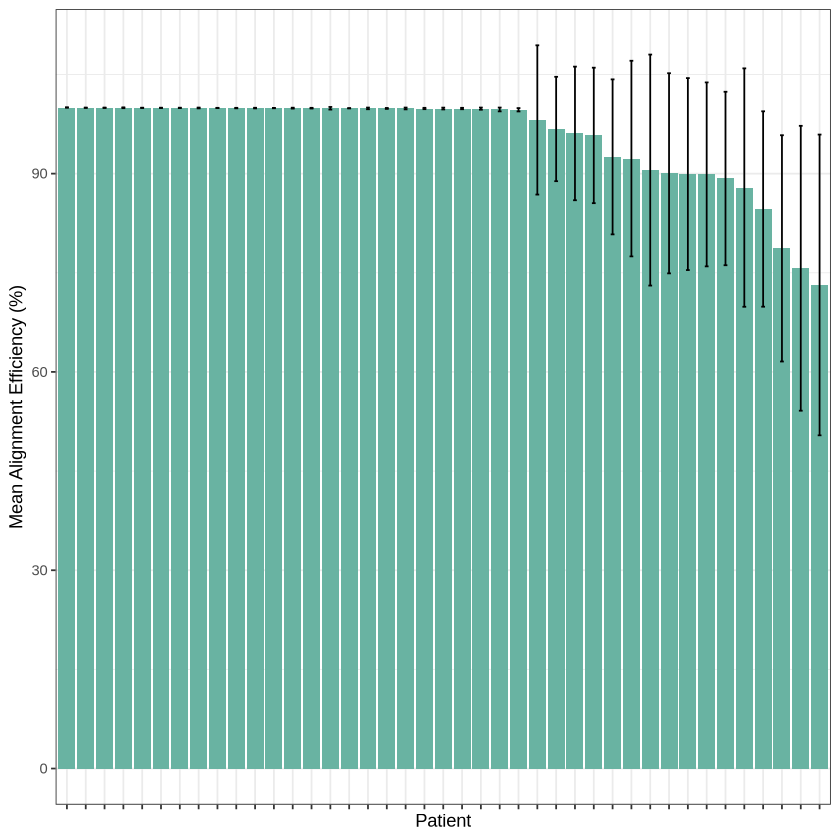

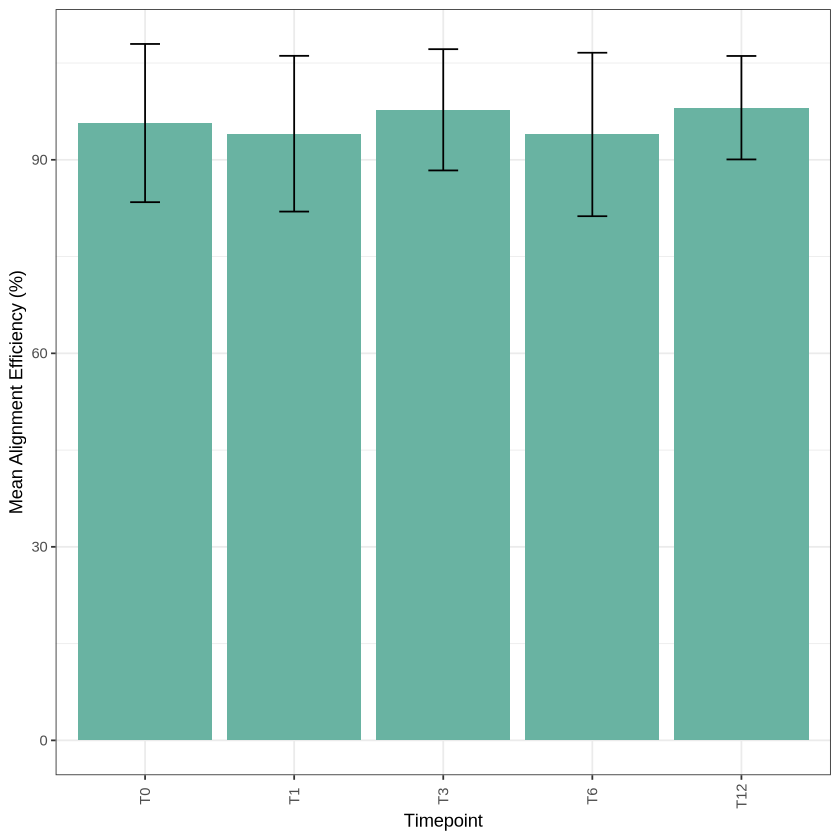

In [17]:
# Plot the frequence alignment distribution across groups
freqalignment_A <- ggplot(AlignmentEfficiency_patient, 
       aes(x = fct_reorder(Patient, -mean_AlignmentEfficiency), y = mean_AlignmentEfficiency)) +
  geom_bar(stat = "identity", fill = "#69b3a2") +
  geom_errorbar(aes(ymin = mean_AlignmentEfficiency - sd_AlignmentEfficiency,
                    ymax = mean_AlignmentEfficiency + sd_AlignmentEfficiency),
                width = 0.2) +
  theme_bw() +
  labs(y = "Mean Alignment Efficiency (%)",
       x = "Patient") +
  theme(axis.text.x = element_blank())  # remove x-axis text
freqalignment_A

## Make sure the levels are ordered
AlignmentEfficiency_timepoint$Timepoint <- factor(
  AlignmentEfficiency_timepoint$Timepoint,
  levels = c("T0", "T1", "T3", "T6", "T12")
)

freqalignment_B <- ggplot(AlignmentEfficiency_timepoint, 
       aes(x = Timepoint, y = mean_AlignmentEfficiency)) +
  geom_bar(stat = "identity", fill = "#69b3a2") +
  geom_errorbar(aes(ymin = mean_AlignmentEfficiency - sd_AlignmentEfficiency,
                    ymax = mean_AlignmentEfficiency + sd_AlignmentEfficiency),
                width = 0.2) +
  theme_bw() +
  labs(y = "Mean Alignment Efficiency (%)",
       x = "Timepoint") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

freqalignment_B

png 
  3

pdf 
  2

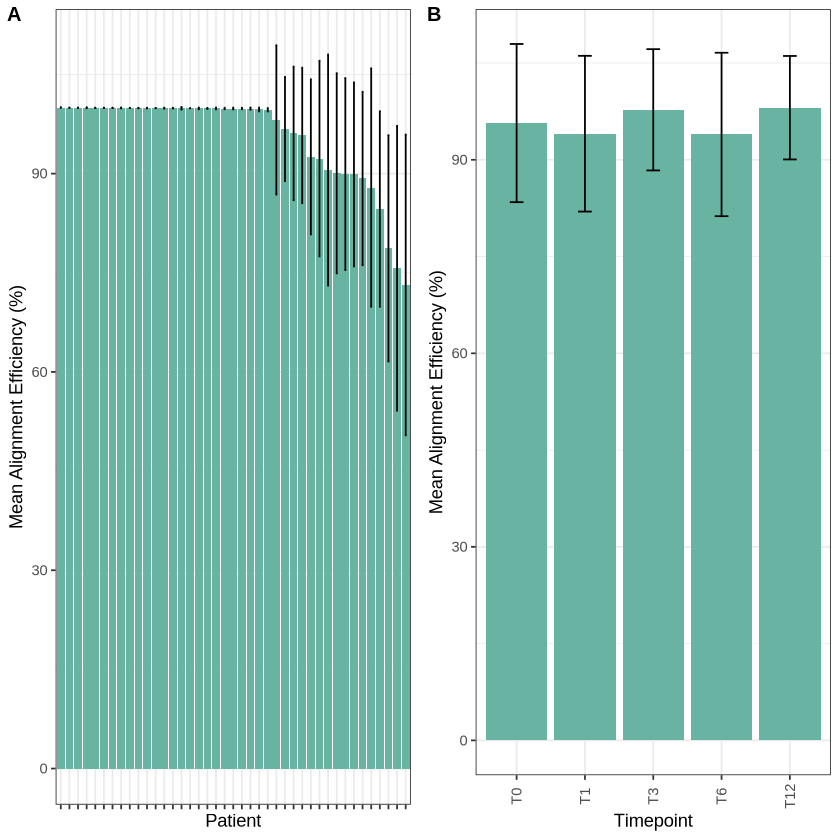

In [18]:
## Arrange plots
freqalignment_groups <- ggarrange(freqalignment_A, freqalignment_B, 
          labels = c("A", "B"),
          font.label = list(size = 12),
          ncol = 2, nrow = 1) # this will couple the plots, arranging them (in this case) in 2 columns and 1 row 
freqalignment_groups

# Save the plot as a PNG file
dev.copy(png, filename = "freqalignment_groups.png", width = 1800, height = 1200, res = 300)
dev.off()  # Close the PNG device